In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob 
import numpy as np
import seaborn as sb

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# lista de todos os arquivos
caged_files = sorted(glob('teste/CAGEDMOV*.txt'))
# concatena os arquivos
pandemia_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [3]:
pandemia_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [4]:
caged_files

['teste/CAGEDMOV202101.txt',
 'teste/CAGEDMOV202102.txt',
 'teste/CAGEDMOV202103.txt']

In [5]:
print('data competencia:', pandemia_df['competência'].value_counts().sort_index().index.values,
      '\ndata sexo:', pandemia_df['sexo'].value_counts().sort_index().index.values,
      '\ndata movimentacao:', pandemia_df['saldomovimentação'].value_counts().sort_index().index.values,
      '\ndata seção:', pandemia_df['seção'].value_counts().sort_index().index.values,
      '\ndata graudeinstrução:', pandemia_df['graudeinstrução'].value_counts().sort_index().index.values)

data competencia: [202101 202102 202103] 
data sexo: [1 3] 
data movimentacao: [-1  1] 
data seção: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'Z'] 
data graudeinstrução: [ 1  2  3  4  5  6  7  8  9 10 11 80]


In [6]:
questao01_df = pandemia_df[['competência','sexo', 'saldomovimentação', 'graudeinstrução', 'seção']]
questao01_df.head()

,competência,sexo,saldomovimentação,graudeinstrução,seção
0,202101,1,1,7,C
1,202101,3,-1,9,N
2,202101,1,-1,7,C
3,202101,3,-1,7,N
4,202101,3,1,7,C


In [7]:
competencia = {
    202101: 'jan/2021',
    202102: 'fev/2021',
    202103: 'mar/2021'
}

sexo = {
    1: 'homem',
    3: 'mulher'
}
saldomovimentacao = {
    1: 'admissao',
    -1: 'demissao'
}

graudeinstrucao = {
    1: 'Analfabeto',
    2: 'Até 5ª Incompleto',
    3: '5ª Completo Fundamental',
    4: '6ª a 9ª Fundamental',
    5: 'Fundamental Completo',
    6: 'Médio Incompleto',
    7: 'Médio Completo',
    8: 'Superior Incompleto',
    9: 'Superior Completo',
    10: 'Mestrado',
    11: 'Doutorado',
    12: 'Verificar 12',
    13: 'Verificar 1',
    80: 'Pós-Graduação completa',
    99: 'Não Identificado'
}

secao = {
    'A': 'Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura',
    'B': 'Indústrias Extrativas',
    'C': 'Indústrias de Transformação',
    'D': 'Eletricidade e Gás',
    'E': 'Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação',
    'F': 'Construção',
    'G': 'Comércio, Reparação de Veículos Automotores e Motocicletas',
    'H': 'Transporte, Armazenagem e Correio',
    'I': 'Alojamento e Alimentação',
    'J': 'Informação e Comunicação',
    'K': 'Atividades Financeiras, de Seguros e Serviços Relacionados',
    'L': 'Atividades Imobiliárias',
    'M': 'Atividades Profissionais, Científicas e Técnicas',
    'N': 'Atividades Administrativas e Serviços Complementares',
    'O': 'Administração Pública, Defesa e Seguridade Social',
    'P': 'Educação',
    'Q': 'Saúde Humana e Serviços Sociais',
    'R': 'Artes, Cultura, Esporte e Recreação',
    'S': 'Outras Atividades de Serviços',
    'T': 'Serviços Domésticos',
    'U': 'Organismos Internacionais e Outras Instituições Extraterritoriais',
    'Z': 'Não identificado'
}



In [8]:
# Substituição dos magic numbers relevantes
questao01_df['graudeinstrução'] = questao01_df['graudeinstrução'].apply(lambda x: graudeinstrucao[x])
questao01_df['seção'] = questao01_df['seção'].apply(lambda x: secao[x])
questao01_df['sexo'] = questao01_df['sexo'].apply(lambda x: sexo[x])
questao01_df['saldomovimentação'] = questao01_df['saldomovimentação'].apply(lambda x: saldomovimentacao[x])

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be

In [9]:
questao01_df.head()

,competência,sexo,saldomovimentação,graudeinstrução,seção
0,202101,homem,admissao,Médio Completo,Indústrias de Transformação
1,202101,mulher,demissao,Superior Completo,Atividades Administrativas e Serviços Compleme...
2,202101,homem,demissao,Médio Completo,Indústrias de Transformação
3,202101,mulher,demissao,Médio Completo,Atividades Administrativas e Serviços Compleme...
4,202101,mulher,admissao,Médio Completo,Indústrias de Transformação


In [10]:
questao01_df.value_counts().sort_index()

competência  sexo    saldomovimentação  graudeinstrução          seção                                                           
202101       homem   admissao           5ª Completo Fundamental  Administração Pública, Defesa e Seguridade Social                     32
                                                                 Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura      7195
                                                                 Alojamento e Alimentação                                             303
                                                                 Artes, Cultura, Esporte e Recreação                                   29
                                                                 Atividades Administrativas e Serviços Complementares                1361
                                                                                                                                     ... 
202103       mulher  demissao           Su

In [11]:
# servicos domesticos com pos-graduacao completa

grau80 = questao01_df['graudeinstrução']=='Pós-Graduação completa'
secaoT = questao01_df['seção']=='Serviços Domésticos'

questao01_df[grau80 & secaoT]

,competência,sexo,saldomovimentação,graudeinstrução,seção
4720159,202102,homem,admissao,Pós-Graduação completa,Serviços Domésticos
5541397,202102,mulher,admissao,Pós-Graduação completa,Serviços Domésticos
7882219,202103,mulher,admissao,Pós-Graduação completa,Serviços Domésticos
8192549,202103,mulher,demissao,Pós-Graduação completa,Serviços Domésticos


# 1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:
data['saldomovimentação'].value_counts().sort_index()

-1    1292965
 1    1694604

Name: saldomovimentação, dtype: int64


In [12]:
admissoes = questao01_df['saldomovimentação'] == "admissao"
demissoes = questao01_df['saldomovimentação'] == "demissao"

In [13]:
admissoes_df = questao01_df[admissoes]
admissoes_df.head()

,competência,sexo,saldomovimentação,graudeinstrução,seção
0,202101,homem,admissao,Médio Completo,Indústrias de Transformação
4,202101,mulher,admissao,Médio Completo,Indústrias de Transformação
5,202101,homem,admissao,Médio Completo,Construção
7,202101,homem,admissao,Analfabeto,"Agricultura, Pecuária, Produção Florestal, Pes..."
10,202101,mulher,admissao,Médio Completo,"Comércio, Reparação de Veículos Automotores e ..."


In [14]:
demissoes_df = questao01_df[demissoes]
demissoes_df.head()

,competência,sexo,saldomovimentação,graudeinstrução,seção
1,202101,mulher,demissao,Superior Completo,Atividades Administrativas e Serviços Compleme...
2,202101,homem,demissao,Médio Completo,Indústrias de Transformação
3,202101,mulher,demissao,Médio Completo,Atividades Administrativas e Serviços Compleme...
6,202101,mulher,demissao,Médio Completo,"Comércio, Reparação de Veículos Automotores e ..."
8,202101,homem,demissao,Médio Completo,"Comércio, Reparação de Veículos Automotores e ..."


In [15]:
# admissoes_df['sexo'].sum()

In [16]:
admissoes_df[['competência', 'sexo']].value_counts().sort_index()

competência  sexo  
202101       homem      932560
             mulher     594523
202102       homem     1012750
             mulher     681854
202103       homem      988324
             mulher     619683
dtype: int64

## - Gênero

### Admissões

In [17]:
admissoes_df['competência'].value_counts().sort_index().index

Int64Index([202101, 202102, 202103], dtype='int64')

In [18]:
mulher = admissoes_df['sexo'] == 'mulher'

In [19]:
homem = admissoes_df['sexo'] == 'homem'

In [20]:
admissoes_df['competência'][mulher].value_counts().sort_index().index

Int64Index([202101, 202102, 202103], dtype='int64')

In [21]:
admissoes_mulher = admissoes_df['competência'][mulher].value_counts().sort_index().values
admissoes_mulher

array([594523, 681854, 619683])

In [22]:
admissoes_df['competência'][homem].value_counts().sort_index().index

Int64Index([202101, 202102, 202103], dtype='int64')

In [23]:
admissoes_homem = admissoes_df['competência'][homem].value_counts().sort_index().values
admissoes_homem

array([ 932560, 1012750,  988324])

In [24]:
total_admissoes_df = admissoes_df['competência'].value_counts().sort_index().values
total_admissoes_df

array([1527083, 1694604, 1608007])

In [25]:
index_admissoes_df = admissoes_df['competência'].value_counts().sort_index().index

In [26]:
admissoes_sexo = {
    'Mulheres': admissoes_mulher,
    'Homens': admissoes_homem,
    'Total': total_admissoes_df
    }
admissoes_sexo_df = pd.DataFrame(admissoes_sexo, index = index_admissoes_df)

In [27]:
admissoes_sexo_df['Mulheres %'] = round(admissoes_sexo_df['Mulheres'] / admissoes_sexo_df['Total'] * 100,2)
admissoes_sexo_df['Homens %'] = round(admissoes_sexo_df['Homens'] / admissoes_sexo_df['Total'] * 100,2)

In [28]:
admissoes_sexo_df

,Mulheres,Homens,Total,Mulheres %,Homens %
202101,594523,932560,1527083,38.93,61.07
202102,681854,1012750,1694604,40.24,59.76
202103,619683,988324,1608007,38.54,61.46


In [29]:
print("% de mulheres admitidas: ", round(admissoes_sexo_df['Mulheres'].sum() / admissoes_sexo_df['Total'].sum()*100), "%" \
      "\n% de homens admitidos: ", round(admissoes_sexo_df['Homens'].sum() / admissoes_sexo_df['Total'].sum()*100), "%")


% de mulheres admitidas:  39 %
% de homens admitidos:  61 %


### Visual

In [30]:
# converte indice para string para pontuar no eixo y
admissoes_sexo_df.index = admissoes_sexo_df.index.map(str)

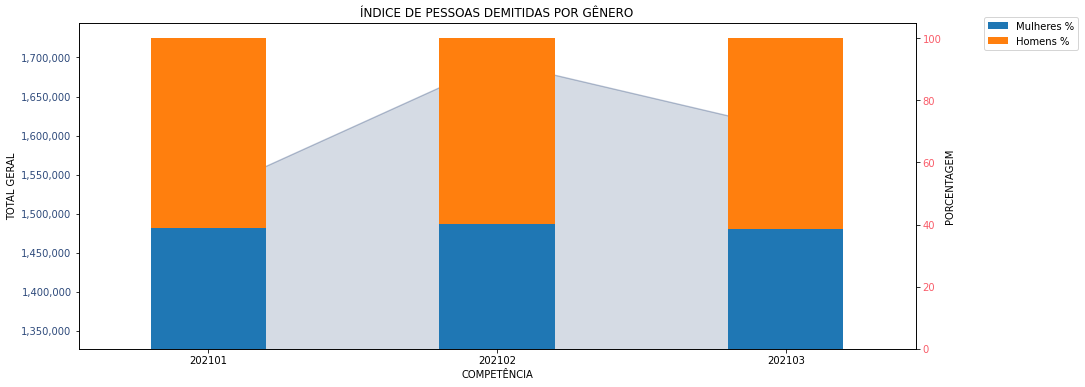

In [31]:
fig, ax1 = plt.subplots()
#ax1
ax1_color = '#2f4b7c'
ax1.set_title('ÍNDICE DE PESSOAS DEMITIDAS POR GÊNERO')
ax1 = admissoes_sexo_df[
    'Total'].plot(kind='area', \
                  alpha=0.2,\
                  color=ax1_color, \
                  figsize = (15,6), \
                  ylim=[admissoes_sexo_df['Total'].min()-200000, admissoes_sexo_df['Total'].max()+50000],
                  ylabel='TOTAL GERAL',
                  xlabel='COMPETÊNCIA'
                 )

ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.ticklabel_format(axis='y',style='plain', ) 
ax1.get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))

#ax2
ax2_color = '#f95d6a'
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor=ax2_color)
admissoes_sexo_df[
    ['Mulheres %', 'Homens %']].plot.bar( \
         width= 0.4, \
        stacked=True,
        ylabel='PORCENTAGEM',
#          ylim=[0, 70],
         ax=ax2).legend(
    bbox_to_anchor=(1.2, .9), loc='lower right')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped



<AxesSubplot:title={'center':'ÍNDICE DE PESSOAS ADMITIDAS POR GÊNERO'}, ylabel='Período de Pandemia'>

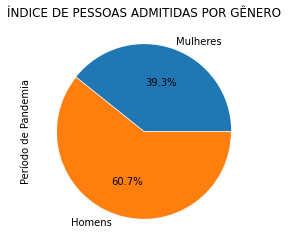

In [56]:
admissoes_sexo_df.sum()[0:2].plot.pie(
    autopct='%1.1f%%',
    explode=(0, 0.01),
    title='ÍNDICE DE PESSOAS ADMITIDAS POR GÊNERO',
    ylabel= 'Período de Pandemia'
)

### Demissões

In [38]:
demissoes_df[['competência', 'sexo']].value_counts().sort_index()

competência  sexo  
202101       homem     762001
             mulher    504729
202102       homem     789586
             mulher    503379
202103       homem     878359
             mulher    545508
dtype: int64

In [39]:
mulher = demissoes_df['sexo'] == 'mulher'

In [40]:
homem = demissoes_df['sexo'] == 'homem'

In [41]:
index_demissoes_df = demissoes_df['competência'].value_counts().sort_index().index
index_demissoes_df

Int64Index([202101, 202102, 202103], dtype='int64')

In [42]:
demissoes_mulher = demissoes_df['competência'][mulher].value_counts().sort_index().values
demissoes_mulher

array([504729, 503379, 545508])

In [43]:
demissoes_homem = demissoes_df['competência'][homem].value_counts().sort_index().values
demissoes_homem

array([762001, 789586, 878359])

In [44]:
total_demissoes_df = demissoes_df['competência'].value_counts().sort_index().values
total_demissoes_df

array([1266730, 1292965, 1423867])

In [45]:
demissoes_sexo = {
    'Mulheres': demissoes_mulher,
    'Homens': demissoes_homem,
    'Total': total_demissoes_df
    }
demissoes_sexo_df = pd.DataFrame(demissoes_sexo, index = index_demissoes_df)

In [46]:
demissoes_sexo_df['Mulheres %'] = round(demissoes_sexo_df['Mulheres'] / demissoes_sexo_df['Total'] * 100,2)
demissoes_sexo_df['Homens %'] = round(demissoes_sexo_df['Homens'] / demissoes_sexo_df['Total'] * 100,2)

In [47]:
demissoes_sexo_df

,Mulheres,Homens,Total,Mulheres %,Homens %
202101,504729,762001,1266730,39.85,60.15
202102,503379,789586,1292965,38.93,61.07
202103,545508,878359,1423867,38.31,61.69


In [48]:
print("% de mulheres demitidas: ", round(demissoes_sexo_df['Mulheres'].sum() / demissoes_sexo_df['Total'].sum()*100), "%" \
      "\n% de homens demitidos: ", round(demissoes_sexo_df['Homens'].sum() / demissoes_sexo_df['Total'].sum()*100), "%")


% de mulheres demitidas:  39 %
% de homens demitidos:  61 %


### Visual

In [49]:
# converte indice para string para pontuar no eixo y
demissoes_sexo_df.index = demissoes_sexo_df.index.map(str)

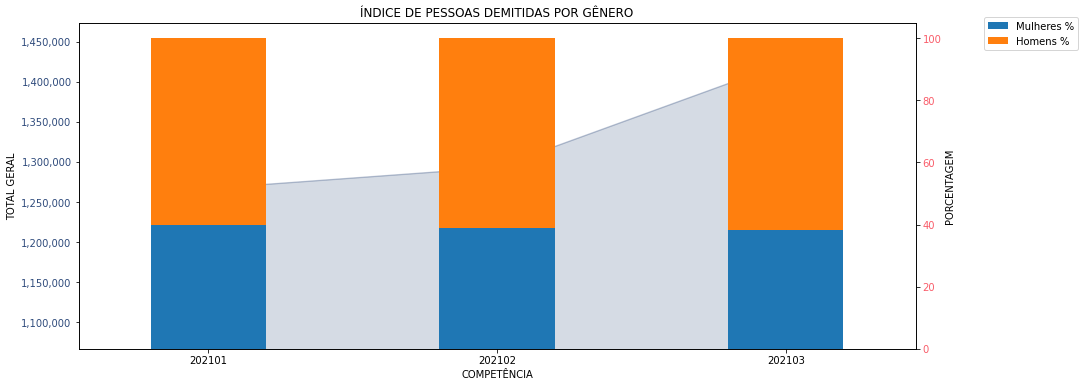

In [50]:
fig, ax1 = plt.subplots()
#ax1
ax1_color = '#2f4b7c'
ax1.set_title('ÍNDICE DE PESSOAS DEMITIDAS POR GÊNERO')
ax1 = demissoes_sexo_df[
    'Total'].plot(kind='area', \
                  alpha=0.2,\
                  color=ax1_color, \
                  figsize = (15,6), \
                  ylim=[demissoes_sexo_df['Total'].min()-200000, demissoes_sexo_df['Total'].max()+50000],
                  ylabel='TOTAL GERAL',
                  xlabel='COMPETÊNCIA'
                 )

ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.ticklabel_format(axis='y',style='plain', ) 
ax1.get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))

#ax2
ax2_color = '#f95d6a'
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor=ax2_color)
demissoes_sexo_df[
    ['Mulheres %', 'Homens %']].plot.bar( \
        width= 0.4, \
        stacked=True,
        ylabel='PORCENTAGEM',
#          ylim=[0, 70],
         ax=ax2).legend(
    bbox_to_anchor=(1.2, .9), loc='lower right')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped



<AxesSubplot:title={'center':'ÍNDICE DE PESSOAS ADMITIDAS POR GÊNERO'}, ylabel='Período de Pandemia'>

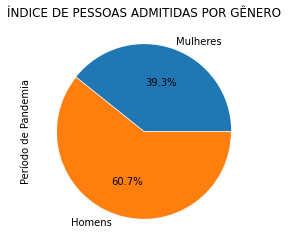

In [56]:
admissoes_sexo_df.sum()[0:2].plot.pie(
    autopct='%1.1f%%',
    explode=(0, 0.01),
    title='ÍNDICE DE PESSOAS DEMITIDAS POR GÊNERO',
    ylabel= 'Período de Pandemia'
)

In [ ]:
# pd.pivot_table(admissoes_df, values='sexo', index='competência',
# #                     columns='sexo',
#                        aggfunc=np.sum)